# sqlite3 python interface library   <a href="https://docs.python.org/3/library/sqlite3.html"> doc</a>

SQLite is a C library that provides a lightweight disk-based database that doesn’t require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language. Some applications can use SQLite for internal data storage. It’s also possible to prototype an application using SQLite and then port the code to a larger database such as PostgreSQL or Oracle.

Use <a href="https://inloop.github.io/sqlite-viewer/">online sqlite viewer</a> to examine database

In [ ]:
import sqlite3

### First, need to establish a connection to a database

In [ ]:
conn = sqlite3.connect("test.db")

### Then, need to create a cursor object.  You use a cursor object to execute sql commands

In [ ]:
cur = conn.cursor()

### Now, we will create a couple of tables:

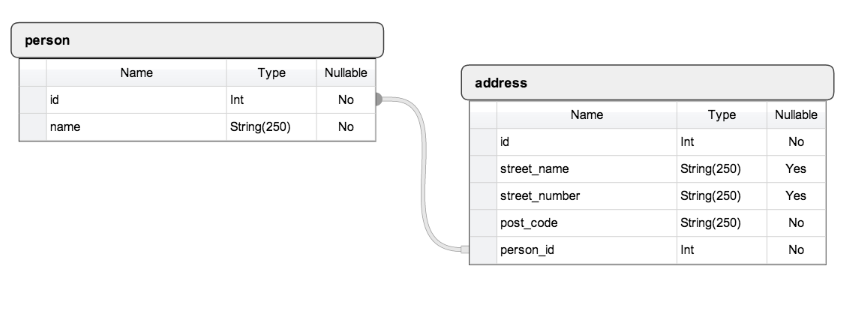

### Create the "person" table

In [ ]:
cur.execute('''
          CREATE TABLE person
          (id INTEGER PRIMARY KEY ASC, 
           name varchar(250) NOT NULL)
          ''')

### Create the "address" table

In [ ]:
cur.execute('''
          CREATE TABLE address
          (id INTEGER PRIMARY KEY ASC, 
           street_name varchar(250), 
           street_number varchar(250),
           zip_code varchar(250) NOT NULL, 
           person_id INTEGER NOT NULL,
           FOREIGN KEY(person_id) REFERENCES person(id))
          ''')

### List all tables in the database for the current cursor/connection

In [ ]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cur.fetchall())
#fetchone(),fetchmany()we can also use instead

### Get the details of the persion table (schema)

In [ ]:
cur.execute("PRAGMA table_info('person')")

for row in cur.fetchall():
    print(row)

### Load some data into the person table

In [ ]:
cur.execute("INSERT INTO person VALUES(1, 'Alan');")

cur.execute("INSERT INTO person VALUES(2, 'Billy');")

In [ ]:
cur.execute("SELECT * FROM person;")

for row in cur.fetchall():
    print(row)

In [ ]:
cur.execute("INSERT INTO address VALUES(1, 'San Fernando Street', '200', '95131', 1);")

cur.execute("INSERT INTO address VALUES(2, 'North First Street', '1210', '95112', 2);")

In [ ]:
cur.execute("SELECT * FROM address;")

for row in cur.fetchall():
    print(row)

In [ ]:
cur.execute("SELECT p.*, a.street_number, a.street_name, a.zip_code FROM person p JOIN address a on p.id = a.id ;")

for row in cur.fetchall():
    print(row)

### Database changes aren't saved until the commit command is executed

In [ ]:
conn.commit()
conn.close()

In [ ]:
Sql alchemt
orm
objecct relational mapping